# Hypothesis: I think students that report more hours spent using technology for personal use are more likely to find COMP110 difficult.

In [15]:
__author__ = "730323188"

### I am told the cell below is used to automatically reload changes in `data.utils` as this notebook runs. As far as I know, it's magic.

In [1]:
%reload_ext autoreload
%autoreload 2

### First, I will read the csv data into a column-oriented table, so I can later isolate the two columns I am interested in (`hours_online_social` and `difficulty`).

In [2]:
from data_utils import read_csv_rows, columnar
data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

### Next, I will select the `hours_online_social` column. The first five rows are shown below.

In [3]:
from data_utils import head, select
hours_subset: dict[str, list[str]] = select(columns, ["hours_online_social"])
head(hours_subset, 5)

{'hours_online_social': ['3 to 5 hours',
  '5 to 10 hours',
  '3 to 5 hours',
  '5 to 10 hours',
  '3 to 5 hours']}

### Just like in the cell above, I will now select the `difficulty` column and display the first five rows.

In [4]:
from data_utils import head, select
dif_subset: dict[str, list[str]] = select(columns, ["difficulty"])
head(dif_subset, 5)

{'difficulty': ['5', '3', '5', '6', '4']}

### Next, I will count the number of students that chose each option for `hours_online_social`.

In [5]:
from data_utils import count
subset: dict[str, list[str]] = select(columns, ["hours_online_social"])
social_hours_count: dict[str, int] = count(subset["hours_online_social"])
print(social_hours_count)


{'3 to 5 hours': 297, '5 to 10 hours': 117, '0 to 2 hours': 129, '10+ hours': 23, 'None': 1, '': 6}


### These totals show that most students spend `3-5` hours per day using technology for personal use. Many other students fall in the `0-2` and `5-10` categories, but the `10+` and `None` categories are relatively empty.

### The next cell will count up the totals for each choice in `difficulty`. 

In [6]:
from data_utils import count
subset: dict[str, list[str]] = select(columns, ["difficulty"])
difficulty_count: dict[str, int] = count(subset["difficulty"])
print(difficulty_count)

{'5': 158, '3': 54, '6': 112, '4': 120, '7': 86, '2': 32, '1': 11}


### Now, I will create a mask for difficulty ratings >= 5 which signifies a rating harder than neutral.

In [7]:
from data_utils import greater_than
over_four_mask: list[bool] = greater_than(columns["difficulty"], 4)
print(over_four_mask)

[True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, True, True, False, False, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, False, True, True, True, False, False, False, True, False, True, True, False, True, True, False, False, True, False, False, False, True, True, True, True, False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, True, True, True, False, True, False, False, True, True, False, False, False, True, False, True, True, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, True, False, False, True, True, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, True, True, False, False, Fals

### Next, I will return the `True` values like we learned in lecture.

In [8]:
from data_utils import masked
over_four: list[str] = masked(columns["hours_online_social"], over_four_mask)
print(over_four)

['3 to 5 hours', '3 to 5 hours', '5 to 10 hours', '0 to 2 hours', '5 to 10 hours', '3 to 5 hours', '5 to 10 hours', '5 to 10 hours', '3 to 5 hours', '5 to 10 hours', '5 to 10 hours', '5 to 10 hours', '5 to 10 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '5 to 10 hours', '3 to 5 hours', '5 to 10 hours', '5 to 10 hours', '5 to 10 hours', '0 to 2 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', 'None', '0 to 2 hours', '3 to 5 hours', '3 to 5 hours', '0 to 2 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '5 to 10 hours', '10+ hours', '0 to 2 hours', '0 to 2 hours', '3 to 5 hours', '3 to 5 hours', '5 to 10 hours', '3 to 5 hours', '3 to 5 hours', '0 to 2 hours', '0 to 2 hours', '3 to 5 hours', '5 to 10 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '0 to 2 hours', '0 to 2 hours', '5 to 10 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '3 to 5 hours', '5

### Next, I will count the totals of the cell above.

In [9]:
from data_utils import count
comp_is_hard: dict[str, int] = count(over_four)
print(comp_is_hard)

{'3 to 5 hours': 186, '5 to 10 hours': 74, '0 to 2 hours': 82, 'None': 1, '10+ hours': 13}


### Now, I will complete the same sequence of creating a mask, filtering the `True` values, and counting the totals for difficulty ratings of <= 3.

In [10]:
from data_utils import less_than, masked, count
under_four_mask: list[bool] = less_than(columns["difficulty"], 4)
under_four: list[str] = masked(columns["hours_online_social"], under_four_mask)
comp_is_easy: dict[str, int] = count(under_four)
print(comp_is_easy)

{'5 to 10 hours': 23, '3 to 5 hours': 53, '10+ hours': 3, '0 to 2 hours': 14, '': 4}


### In the next cell, I will find the percentage of total students for both the hard and easy groups.

In [11]:
from data_utils import percentages
print(f"Ratings > 4 (hard): {percentages(comp_is_hard)}")
print(f"Ratings < 4 (easy): {percentages(comp_is_easy)}")

Ratings > 4 (hard): {'3 to 5 hours': '32.46%', '5 to 10 hours': '12.91%', '0 to 2 hours': '14.31%', 'None': '0.17%', '10+ hours': '2.27%'}
Ratings < 4 (easy): {'5 to 10 hours': '4.01%', '3 to 5 hours': '9.25%', '10+ hours': '0.52%', '0 to 2 hours': '2.44%', '': '0.7%'}


### The next few cells are my best attempt to represent the `hard` and `easy` dictionaries shown above as bar plots.

In [12]:
import seaborn

### Here is the `hard` group:

<AxesSubplot:>

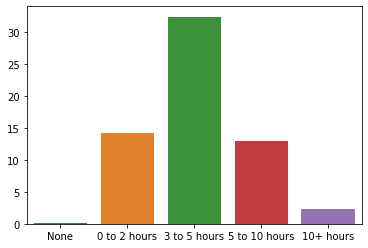

In [13]:
seaborn.barplot(x=["None", "0 to 2 hours", "3 to 5 hours", "5 to 10 hours", "10+ hours"], y=[0.17, 14.31, 32.46, 12.91, 2.27])

### This one is the `easy` group.

<AxesSubplot:>

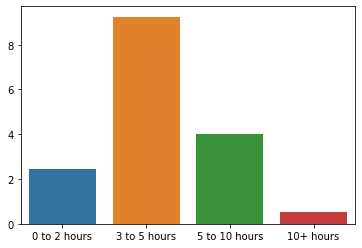

In [14]:
seaborn.barplot(x=["0 to 2 hours", "3 to 5 hours", "5 to 10 hours", "10+ hours"], y=[2.44, 9.25, 4.01, .52])

## Ultimately, I do not believe these data support my hypothesis that students who report more hours spent using technology for personal use are more likely to find COMP110 difficult. Students in every column in the `hours_online_social` table skew toward the > 4 `difficulty` section. Although approximately 60% of the class rated COMP110 as 5 or higher in difficulty, there is no indication that more time spent on social media correlates with higher difficulty ratings. 